This notebook will be used primarily for the Coursera-IBM Data Science Capstone Project.


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
## Since the Seattle dataset is updated frequently, I have uploaded a copy of the dataset from September 17, 2020, in order to have a stable basis for analysis. 
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_41b521ae2f0a42b289a92a4b6578e590 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SzqMBMYAaAjqFYfM5wXL-onXI16NXwpXhac7fu7HCkoL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_41b521ae2f0a42b289a92a4b6578e590.get_object(Bucket='machinelearningwithpythoncapstone-donotdelete-pr-xaydtjk8mqldvq',Key='Collisions .csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)



In [5]:
# A cursory analysis of the data 
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,NaN,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,...,NaN,NaN,NaN,4030032.0,NaN,NaN,NaN,0,0,N
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NaN,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [6]:
df.shape

(221389, 40)

In [7]:
df.columns.values

array(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'], dtype=object)

In [8]:
df.dtypes.value_counts()

object     23
int64      12
float64     5
dtype: int64

In [9]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 40 columns):
X                  213918 non-null float64
Y                  213918 non-null float64
OBJECTID           221389 non-null int64
INCKEY             221389 non-null int64
COLDETKEY          221389 non-null int64
REPORTNO           221389 non-null object
STATUS             221389 non-null object
ADDRTYPE           217677 non-null object
INTKEY             71884 non-null float64
LOCATION           216801 non-null object
EXCEPTRSNCODE      100986 non-null object
EXCEPTRSNDESC      11779 non-null object
SEVERITYCODE       221388 non-null object
SEVERITYDESC       221389 non-null object
COLLISIONTYPE      195159 non-null object
PERSONCOUNT        221389 non-null int64
PEDCOUNT           221389 non-null int64
PEDCYLCOUNT        221389 non-null int64
VEHCOUNT           221389 non-null int64
INJURIES           221389 non-null int64
SERIOUSINJURIES    221389 non-null int64
FATALITIES     

In [11]:
### There are several attributes which have no value for further analysis, let's drop them.
df1 = df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'SDOT_COLCODE', 'SDOT_COLDESC', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'SDOTCOLNUM'],axis=1)



In [12]:
df1.shape

(221389, 27)

In [13]:
### Overlay to original df name
df = df1

In [14]:
### Confirm original df, updated shape
df.shape

(221389, 27)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 27 columns):
X                  213918 non-null float64
Y                  213918 non-null float64
ADDRTYPE           217677 non-null object
LOCATION           216801 non-null object
EXCEPTRSNCODE      100986 non-null object
EXCEPTRSNDESC      11779 non-null object
SEVERITYCODE       221388 non-null object
SEVERITYDESC       221389 non-null object
COLLISIONTYPE      195159 non-null object
PERSONCOUNT        221389 non-null int64
PEDCOUNT           221389 non-null int64
PEDCYLCOUNT        221389 non-null int64
VEHCOUNT           221389 non-null int64
INJURIES           221389 non-null int64
SERIOUSINJURIES    221389 non-null int64
FATALITIES         221389 non-null int64
INCDATE            221389 non-null object
INCDTTM            221389 non-null object
JUNCTIONTYPE       209417 non-null object
INATTENTIONIND     30188 non-null object
UNDERINFL          195179 non-null object
WEATHER       

Begin data evaluation and cleansing 

Severity Code 

In [16]:
df["SEVERITYCODE"].value_counts(normalize=True)*100

1     62.151517
2     26.535765
0      9.753916
2b     1.401160
3      0.157642
Name: SEVERITYCODE, dtype: float64

In [17]:
df["SEVERITYCODE"].unique()

array(['1', '0', '2', '2b', '3', nan], dtype=object)

In [18]:
df["SEVERITYCODE"].value_counts()

1     137596
2      58747
0      21594
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

In [19]:
dftemp = df[["SEVERITYCODE", "SEVERITYDESC"]]
dftemp[~(dftemp.duplicated())].style.hide_index()

SEVERITYCODE,SEVERITYDESC
1,Property Damage Only Collision
0,Unknown
2,Injury Collision
2b,Serious Injury Collision
3,Fatality Collision
nan,Unknown


In [20]:
### Replace nan SEVERITYCODEs with 0.
df["SEVERITYCODE"].fillna('0', inplace=True)

In [21]:
df["SEVERITYCODE"].value_counts()

1     137596
2      58747
0      21595
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

SEVERITYCODE = 0 shows an increase of 1 because of the single nan value.

In [22]:
dftemp = df[["SEVERITYCODE", "SEVERITYDESC"]]
dftemp[~(dftemp.duplicated())].style.hide_index()

SEVERITYCODE,SEVERITYDESC
1,Property Damage Only Collision
0,Unknown
2,Injury Collision
2b,Serious Injury Collision
3,Fatality Collision


Cases where SEVERITYCODE = 0 (Unknown) have no value in predicting our target variable of SEVERITYCODE. Let's retrieve indexes for all SEVERITYCODE == 0, and use them to delete the related rows. 

In [23]:
### Retrieve SEVERITYCODE indices
indexNames = df[df['SEVERITYCODE'] == "0"].index

In [24]:
### Use indices to drop SEVERITYCODE == 0. 
df.drop(indexNames, inplace=True)


In [25]:
df.shape

(199794, 27)

In [26]:
df["SEVERITYCODE"].value_counts()

1     137596
2      58747
2b      3102
3        349
Name: SEVERITYCODE, dtype: int64

Let's realign SEVERITYCODE values 3 --> 4, and 2b --> 3.

In [27]:
df['SEVERITYCODE'].replace('3', '4', inplace=True)
df['SEVERITYCODE'].replace('2b', '3', inplace=True)

In [28]:
df["SEVERITYCODE"].value_counts()

1    137596
2     58747
3      3102
4       349
Name: SEVERITYCODE, dtype: int64

plt.title('Accident Count By Severity')
sns.countplot(df['SEVERITYCODE'], data=df)

Handle blank ADDRTYPE rows

In [30]:
df["ADDRTYPE"].value_counts()

Block           129694
Intersection     67405
Alley              764
Name: ADDRTYPE, dtype: int64

In [31]:
df['ADDRTYPE'].fillna('Unknown', inplace=True)

In [32]:
df["ADDRTYPE"].value_counts()

Block           129694
Intersection     67405
Unknown           1931
Alley              764
Name: ADDRTYPE, dtype: int64

In [41]:
df['ADDRTYPE'].value_counts().to_frame('Counts')

,Counts
Block,129694
Intersection,67405
Unknown,1931
Alley,764


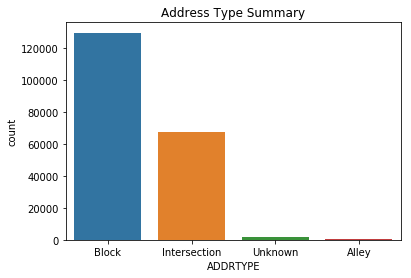

In [33]:
plt.title('Address Type Summary')
sns.countplot(df['ADDRTYPE'], data=df)

Extract month and year from INCDATE

In [34]:
df.shape

(199794, 27)

In [35]:
## Save the intermediate file to CSV
filename = "Collisions Without Severity Equals 0.csv"
df.to_csv(filename, index=False)

Convert INCDATE and INCDTTM to datetime format

In [36]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

In [37]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199794 entries, 0 to 221388
Data columns (total 27 columns):
X                  194389 non-null float64
Y                  194389 non-null float64
ADDRTYPE           199794 non-null object
LOCATION           197099 non-null object
EXCEPTRSNCODE      88165 non-null object
EXCEPTRSNDESC      5684 non-null object
SEVERITYCODE       199794 non-null object
SEVERITYDESC       199794 non-null object
COLLISIONTYPE      195157 non-null object
PERSONCOUNT        199794 non-null int64
PEDCOUNT           199794 non-null int64
PEDCYLCOUNT        199794 non-null int64
VEHCOUNT           199794 non-null int64
INJURIES           199794 non-null int64
SERIOUSINJURIES    199794 non-null int64
FATALITIES         199794 non-null int64
INCDATE            199794 non-null datetime64[ns, UTC]
INCDTTM            199794 non-null datetime64[ns]
JUNCTIONTYPE       193413 non-null object
INATTENTIONIND     30188 non-null object
UNDERINFL          195177 non-null ob

In [51]:
### Get year from INCDTTM column
df['year'] = pd.DatetimeIndex(df['INCDTTM']).year

In [52]:
### Get month from INCDTTM column
df['month'] = pd.DatetimeIndex(df['INCDTTM']).month

In [54]:
### Get time from INCDTTM column
df['time'] = pd.DatetimeIndex(df['INCDTTM']).time

In [70]:
### Get weekday from INCDTTM column  0=Monday...6=Sunday
df['weekday'] = pd.DatetimeIndex(df['INCDTTM']).weekday

In [71]:
df.head()

,X,Y,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,year,month,time,weekday
0,-122.320757,47.609408,Block,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,,NaN,1,Property Damage Only Collision,Sideswipe,2,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,N,2020,1,15:21:00,2
1,-122.319561,47.662221,Block,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,,NaN,1,Property Damage Only Collision,Parked Car,2,...,Clear,Dry,Daylight,NaN,NaN,Y,2020,1,08:00:00,1
5,-122.374194,47.564076,Block,SW AVALON WAY BETWEEN SW GENESEE ST AND 35TH A...,,NaN,1,Property Damage Only Collision,Rear Ended,2,...,Clear,Dry,Daylight,NaN,NaN,N,2020,6,17:07:00,3
6,-122.290734,47.709276,Block,35TH AVE NE BETWEEN NE 110TH ST AND NE 113TH ST,,NaN,1,Property Damage Only Collision,Other,2,...,Clear,Wet,Daylight,NaN,Y,N,2020,2,09:49:00,0
8,-122.336565,47.590398,Intersection,COLORADO AVE S AND S ATLANTIC ST,,NaN,1,Property Damage Only Collision,Sideswipe,2,...,Overcast,Dry,Daylight,NaN,NaN,N,2020,1,08:32:00,3


NOTE: year, month, time, and weekday have been added as new attributes to df.

Let's examine the years involved in the collisions.

In [58]:
df['year'].value_counts(normalize=True).round(3)

2006    0.078
2005    0.077
2007    0.074
2008    0.069
2015    0.066
2004    0.061
2014    0.060
2009    0.060
2016    0.059
2012    0.056
2011    0.055
2017    0.055
2010    0.055
2013    0.054
2018    0.053
2019    0.048
2020    0.020
Name: year, dtype: float64

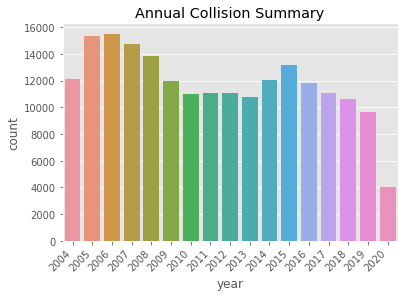

In [74]:
plt.style.use('ggplot')
plt.title('Annual Collision Summary')
ax = sns.countplot(df['year'], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

2020 shows a large decrease in collisions. It is reasonable to assume this is due to the Covid-19 pandemic which had Seattle drivers sheltering
in place for several weeks, thereby reducing traffic volumes and collisions. 

Let's examine the months distribution of the collisions.

In [61]:
df['month'].value_counts(normalize=True).round(3)

10    0.090
6     0.087
5     0.087
7     0.086
8     0.084
11    0.084
1     0.084
3     0.083
4     0.081
9     0.081
12    0.079
2     0.074
Name: month, dtype: float64

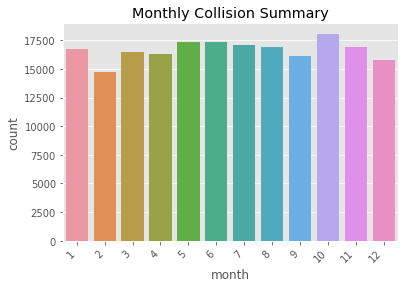

In [75]:
plt.style.use('ggplot')
plt.title('Monthly Collision Summary')
ax = sns.countplot(df['month'], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Graph indicated higher collision count during the winter months of October through January.

In [66]:
df['weekday'].value_counts(normalize=True).round(3)

4    0.166
3    0.151
2    0.148
1    0.147
5    0.140
0    0.135
6    0.113
Name: weekday, dtype: float64

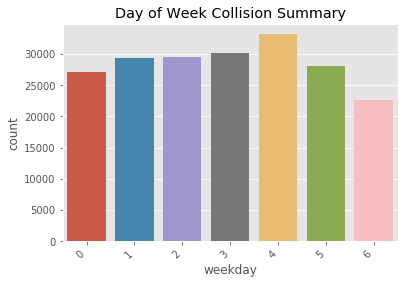

In [72]:
plt.style.use('ggplot')
plt.title('Day of Week Collision Summary')
ax = sns.countplot(df['weekday'], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

0 = Monday; 1 = Tuesday; 2 = Wednesday; 3 = Thursday; 4 = Friday; 5 = Saturday; 6 = Sunday   
Graph indicates increased traffic collisions during Thursday-Saturday period.

Let's look at weather conditions at the time of the collision

In [42]:
df['WEATHER'].value_counts().to_frame('Counts')

,Counts
Clear,114693
Raining,34035
Overcast,28542
Unknown,15131
Snowing,919
Other,860
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


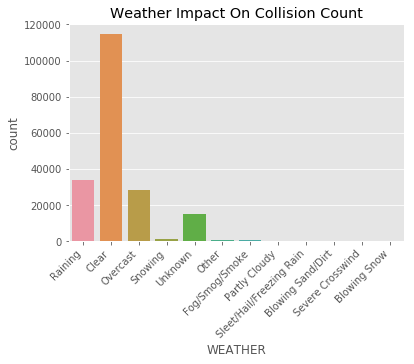

In [76]:
plt.style.use('ggplot')
plt.title('Weather Impact On Collision Count')
ax = sns.countplot(df['WEATHER'], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Let's look at road conditions at the time of the collision

In [45]:
df['ROADCOND'].value_counts().to_frame('Counts')

,Counts
Dry,128535
Wet,48731
Unknown,15139
Ice,1232
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


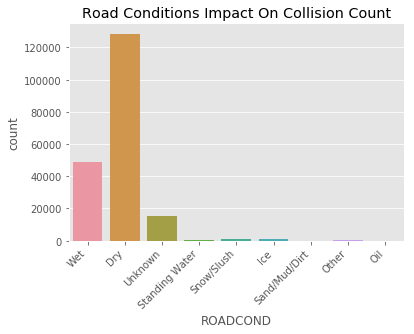

In [77]:
plt.style.use('ggplot')
plt.title('Road Conditions Impact On Collision Count')
ax = sns.countplot(df['ROADCOND'], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Let's look at lighting conditions at the time of the collision

In [47]:
df['LIGHTCOND'].value_counts().to_frame('Counts')

,Counts
Daylight,119445
Dark - Street Lights On,50125
Unknown,13532
Dusk,6082
Dawn,2608
Dark - No Street Lights,1579
Dark - Street Lights Off,1239
Other,244
Dark - Unknown Lighting,23


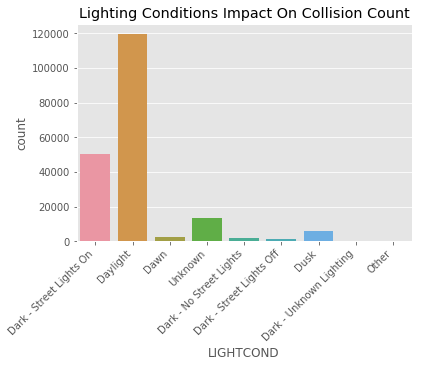

In [78]:
plt.style.use('ggplot')
plt.title('Lighting Conditions Impact On Collision Count')
ax = sns.countplot(df['LIGHTCOND'], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()